In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')


# Import data
from src_experiment import get_new_moons_data_for_all_noises

# Import storage path
from src_experiment.paths import get_test_moon_path

# Import model
from src_experiment import get_model

# Import train model
from src_experiment import train_model

In [2]:
def plot_training(res):
    ax = res[["train_loss", "test_loss"]].plot(
        figsize=(10, 10),
        color=["blue", "blue"],
        style=["-", "--"],
        ylabel="Loss",
    )

    ax2 = res[["train_accuracy", "test_accuracy"]].plot(
        ax=ax,
        secondary_y=True,
        color=["red", "red"],
        style=["-", "--"],
    )

    ax.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    # Fix legends (pandas splits them)
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc="center right")

    plt.show()
    
def plot_results_on_ax(res, ax, title=None):
    res[["train_loss", "test_loss"]].plot(
        ax=ax, style=["-", "--"], legend=False
    )

    ax_acc = ax.twinx()
    res[["train_accuracy", "test_accuracy"]].plot(
        ax=ax_acc, style=["-", "--"], legend=False
    )

    ax.set(xlabel="Epochs", ylabel="Loss", title=title)
    ax_acc.set_ylabel("Accuracy")

    return ax, ax_acc


def plot_all_results(results, titles=None):
    fig, axes = plt.subplots(2, 3, figsize=(14, 7))
    axes = axes.ravel()

    acc_axes = []

    for i, res in enumerate(results):
        _, ax_acc = plot_results_on_ax(
            res,
            axes[i],
            None if titles is None else titles[i],
        )
        acc_axes.append(ax_acc)

    # Legend from first subplot (both y-axes)
    lines = axes[0].lines + acc_axes[0].lines
    labels = ["Train loss", "Test loss", "Train acc", "Test acc"]

    fig.legend(lines, labels, loc="upper center", ncol=4)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()



In [3]:
get_test_moon_path("small", "new", 0.2, 4)

PosixPath('/home/johan/Documents/phd/WP1/geometric_binning_estimator/stored_data/test_moon/model_small/dataset_new/noise_0.2/run_4')

In [4]:
# Model
model = get_model("small", seed=0)
model.state_dict()

OrderedDict([('l1.weight',
              tensor([[-0.0130,  0.9291],
                      [-1.4256, -1.2747],
                      [-0.6671,  0.4645]])),
             ('l1.bias', tensor([0., 0., 0.])),
             ('l2.weight',
              tensor([[-0.0280,  1.1213, -0.1255],
                      [ 0.3742, -0.4274, -0.2780],
                      [-1.3511, -0.9366, -0.5830]])),
             ('l2.bias', tensor([0., 0., 0.])),
             ('l3.weight',
              tensor([[ 0.0524,  0.5591,  0.8486],
                      [-0.9588, -0.6158,  0.5137],
                      [ 1.1743, -0.2910,  1.0583]])),
             ('l3.bias', tensor([0., 0., 0.])),
             ('l4.weight', tensor([[-0.1974,  0.1296,  1.1090]])),
             ('l4.bias', tensor([0.]))])

In [5]:
train = get_new_moons_data_for_all_noises("training")
test = get_new_moons_data_for_all_noises("testing")

In [6]:
def train_for_seed(seed):
    results_list = []
    for noise in [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]:
        out = train_model(get_model("small", seed=seed), train[noise], test[noise], 125)
        results_list.append(out[0])
    plot_all_results(
        results_list,
        titles=[f"Noise = {n}" for n in [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]],
    )

Seed: 2


Training not saved.


Training not saved.


Training not saved.


Training not saved.


Training not saved.


Training not saved.


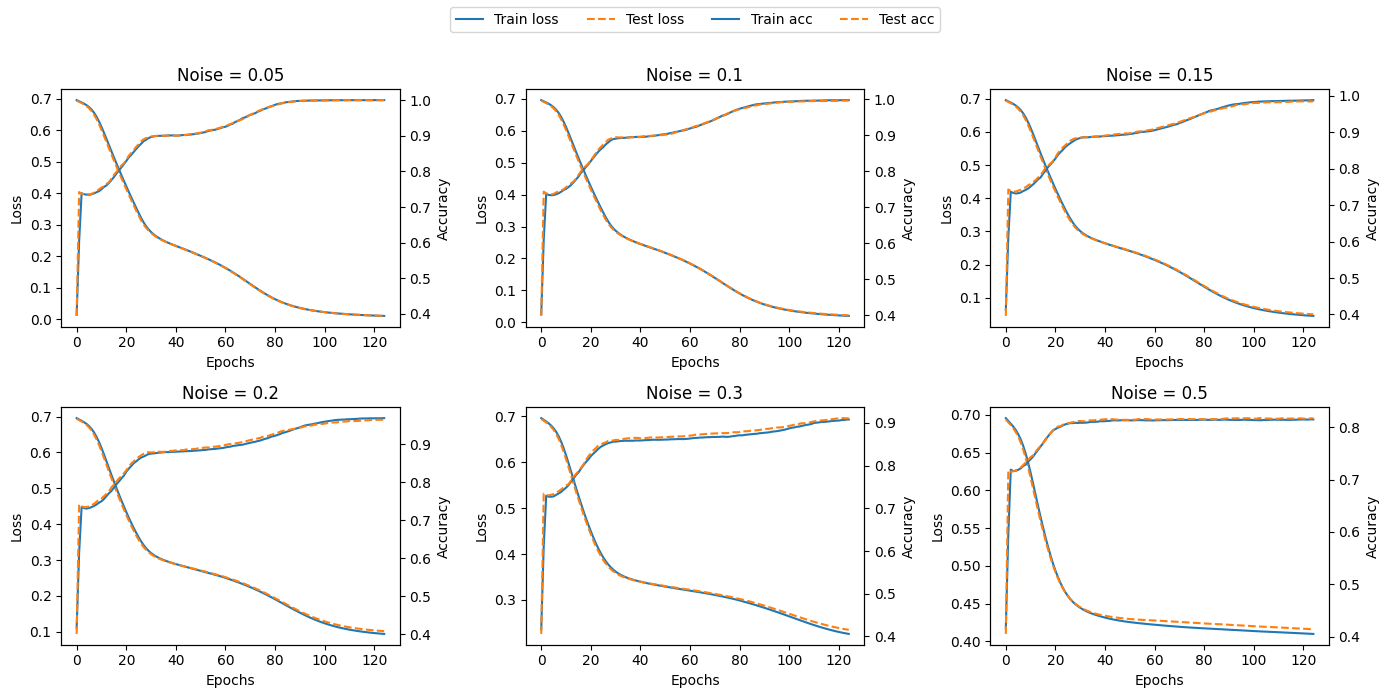

Seed: 8


Training not saved.


Training not saved.


Training not saved.


Training not saved.


Training not saved.


Training not saved.


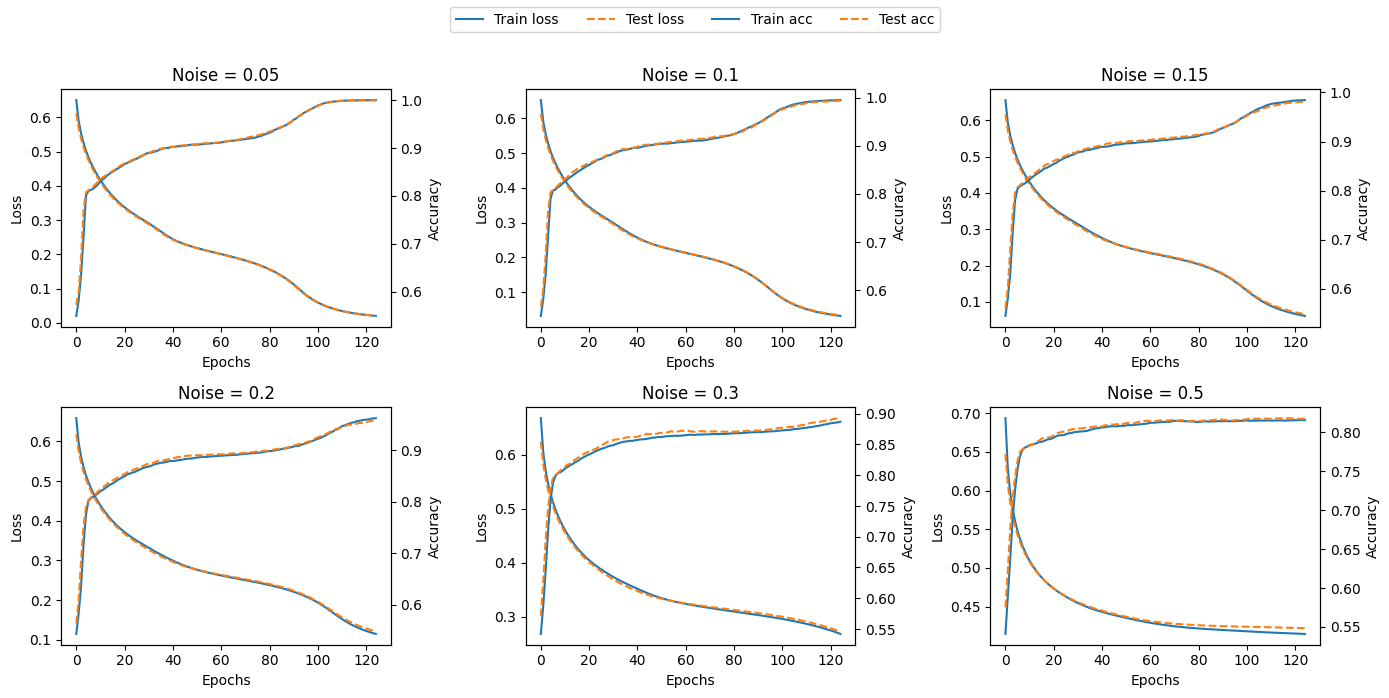

Seed: 17


Training not saved.


Training not saved.


Training not saved.


Training not saved.


Training not saved.


Training not saved.


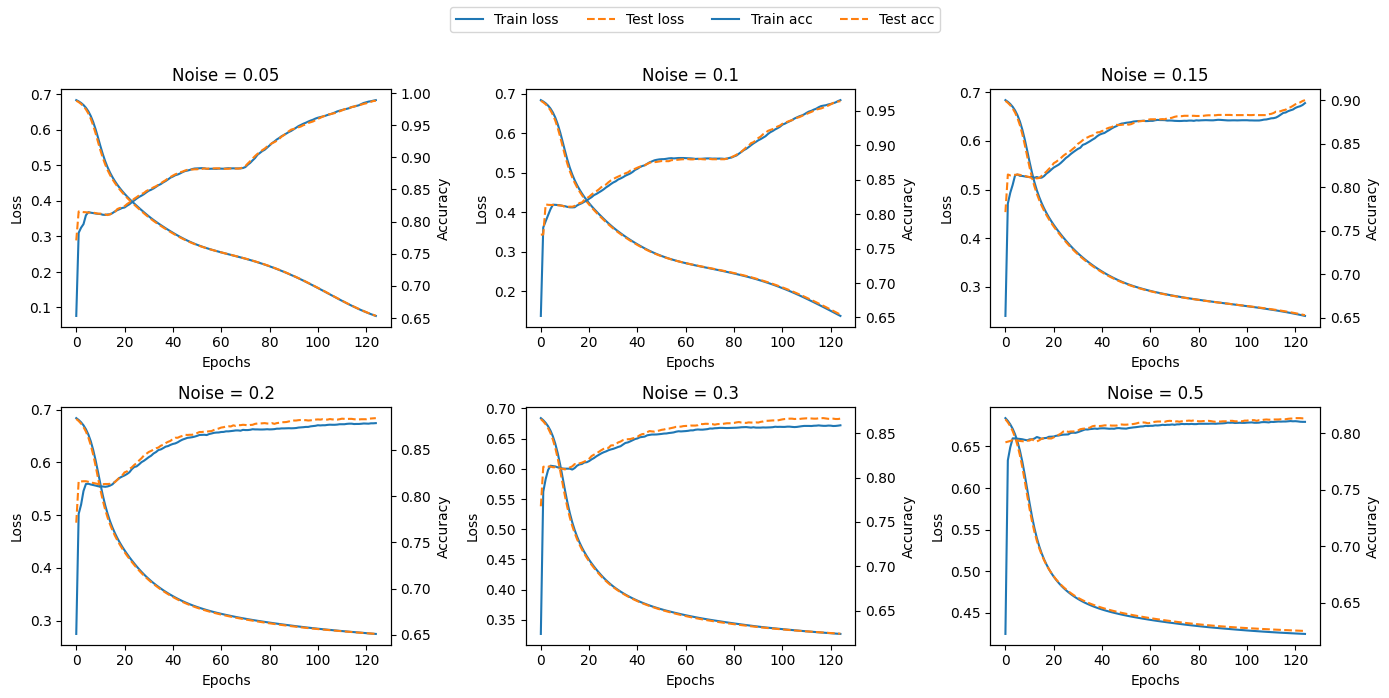

Seed: 24


Training not saved.


Training not saved.


Training not saved.


Training not saved.


Training not saved.


Training not saved.


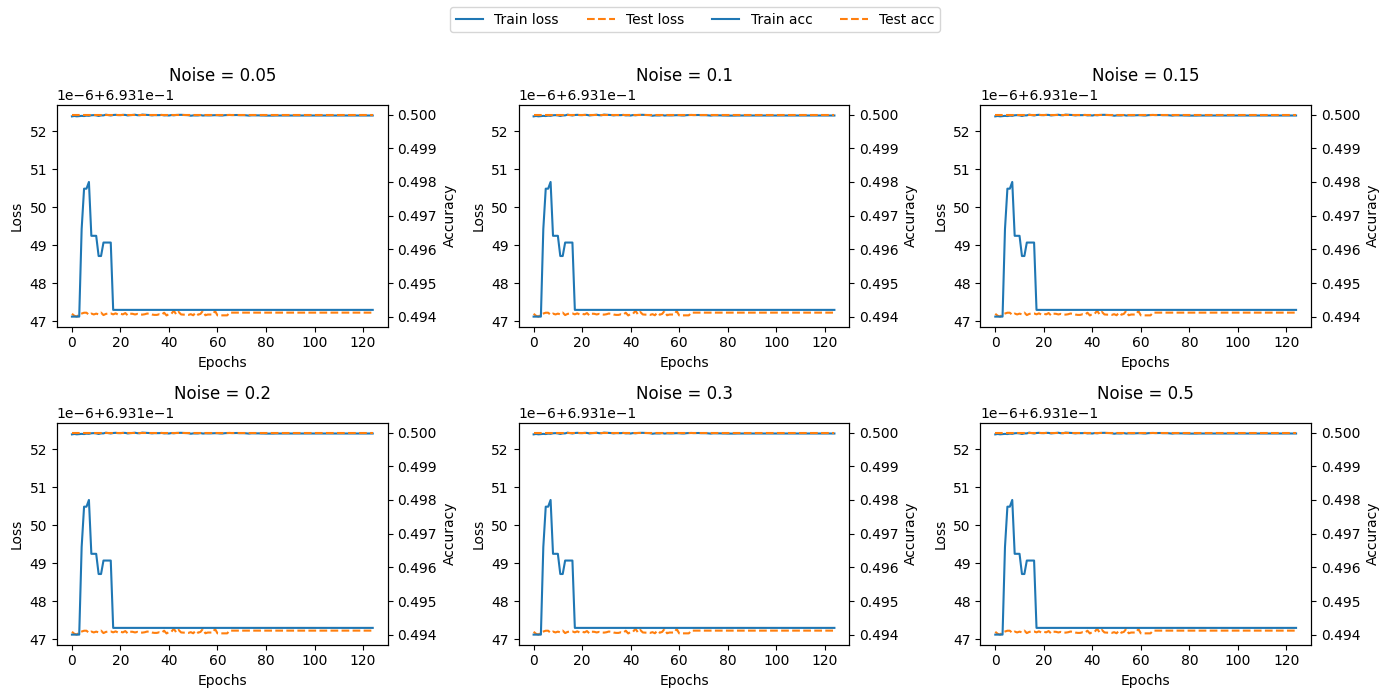

In [7]:
for seed in [2,8,17,24]:
    print(f"Seed: {seed}")
    train_for_seed(seed)